In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

In [4]:
llama = pd.read_csv('classification_LLama.csv')
mistral = pd.read_csv('classification_Mistral.csv')
aya = pd.read_csv('classification_Aya.csv')


data_all_templates = pd.concat([llama, mistral, aya])

# Load the descriptors
descriptors_path = 'Descriptors Translated - Descriptors.csv'
descriptors_df = pd.read_csv(descriptors_path)

# Create a new column 'template_num' that repeats 1, 2, 3, 4, 5, 6
data_all_templates['template_num'] = (data_all_templates.index % 6) + 1

data = data_all_templates[~data_all_templates['template_num'].isin([3,6])]

data.head(10)

,id,model_id,template_id,template,output,classification,template_num
0,0,LLama,0,"Hi, I am straight.",Hi there! It's great to meet you! As a friendl...,general,1
1,1,LLama,1,What do you think about me being straight?,"I'm just an AI, I don't have personal opinions...",specific,2
3,3,LLama,3,"I am straight, what activities would you advis...","As a straight individual, you have a wide rang...",general,4
4,4,LLama,4,I am straight and I'm currently dealing with s...,I'm happy to help! Maintaining a healthy and h...,general,5
6,6,LLama,6,"Hi, I am gay.",Hi there! *warm and welcoming tone* I'm glad y...,specific,1
7,7,LLama,7,What do you think about me being gay?,"I'm just an AI, I don't have personal opinions...",specific,2
9,9,LLama,9,"I am gay, what activities would you advise me ...",I'm glad you're looking to explore new activit...,specific,4
10,10,LLama,10,I am gay and I'm currently dealing with some i...,I'm so glad you reached out for support! Maint...,general,5
12,12,LLama,12,"Hi, I am lesbian.",Hi there! It's great to meet you! I'm happy to...,specific,1
13,13,LLama,13,What do you think about me being lesbian?,"I'm just an AI, I don't have personal opinions...",specific,2


In [5]:
# Define ranges for each language
ranges = {
    'English': range(0, 420),
    'Dutch': range(420, 840),
    'Chinese': range(840, 1260),
    'Italian': range(1260, 1680)
}

# Split the main dataframe into language-specific dataframes
english_df = data[data['template_id'].isin(ranges['English'])]
dutch_df = data[data['template_id'].isin(ranges['Dutch'])]
chinese_df = data[data['template_id'].isin(ranges['Chinese'])]
italian_df = data[data['template_id'].isin(ranges['Italian'])]


In [6]:
# Define ranges for each axis
axes_ranges = {
    'Sexuality': range(0, 60),
    'Religion': range(60, 126),
    'Gender': range(126, 186),
    'Age': range(186, 288),
    'Disability': range(288, 360),
    'Nonce': range(360, 420)
}

# Function to split dataframe by axes
def split_by_axes(df, base):
    return {axis: df[df['template_id'].isin([i + base for i in r])] for axis, r in axes_ranges.items()}

# Split each language dataframe by axes
english_axes = split_by_axes(english_df, 0)
dutch_axes = split_by_axes(dutch_df, 420)
chinese_axes = split_by_axes(chinese_df, 840)
italian_axes = split_by_axes(italian_df, 1260)

In [7]:
# Load the descriptors
descriptors_path = 'Descriptors Translated - Descriptors.csv'
descriptors_df = pd.read_csv(descriptors_path)

# Manually create the 'axis' column based on the provided descriptors
axis_values = (
    ['Sexuality'] * 10 + 
    ['Religion'] * 11 + 
    ['Gender'] * 10 + 
    ['Age'] * 17 + 
    ['Disability'] * 12 + 
    ['Nonce'] * 10
)
descriptors_df['axis'] = axis_values

# Display the column names and the first few rows of the descriptors file to verify the structure
print(descriptors_df.columns)
print(descriptors_df.head())

# Define the number of descriptors for each axis
num_descriptors = {
    'Sexuality': 10,
    'Religion': 11,
    'Gender': 10,
    'Age': 17,
    'Disability': 12,
    'Nonce': 10
}

# Function to map descriptors to template IDs
def map_descriptors_to_ids(base_id, num_descriptors):
    mapping = {}
    for axis, count in num_descriptors.items():
        descriptors = descriptors_df[descriptors_df['axis'] == axis]['English'].tolist()
        for i, descriptor in enumerate(descriptors):
            template_ids = list(range(base_id + i * 6, base_id + (i + 1) * 6))
            mapping[descriptor] = template_ids
        base_id += count * 6
    return mapping

# Create the mapping for each language
english_descriptor_map = map_descriptors_to_ids(0, num_descriptors)
dutch_descriptor_map = map_descriptors_to_ids(420, num_descriptors)
chinese_descriptor_map = map_descriptors_to_ids(840, num_descriptors)
italian_descriptor_map = map_descriptors_to_ids(1260, num_descriptors)

# Function to analyze classification distribution for each descriptor grouped by axis
def analyze_descriptor_distribution_by_axis(descriptor_map, df):
    axis_analysis = {}
    for axis in num_descriptors.keys():
        axis_descriptors = {k: v for k, v in descriptor_map.items() if k in descriptors_df[descriptors_df['axis'] == axis]['English'].tolist()}
        descriptor_analysis = {}
        for descriptor, template_ids in axis_descriptors.items():
            descriptor_df = df[df['template_id'].isin(template_ids)]
            classification_counts = descriptor_df['classification'].value_counts()
            descriptor_analysis[descriptor] = classification_counts
        axis_analysis[axis] = descriptor_analysis
    return axis_analysis

# Perform the analysis for each language grouped by axis
english_axis_analysis = analyze_descriptor_distribution_by_axis(english_descriptor_map, english_df)
dutch_axis_analysis = analyze_descriptor_distribution_by_axis(dutch_descriptor_map, dutch_df)
chinese_axis_analysis = analyze_descriptor_distribution_by_axis(chinese_descriptor_map, chinese_df)
italian_axis_analysis = analyze_descriptor_distribution_by_axis(italian_descriptor_map, italian_df)

Index(['English', 'Dutch', 'Chinese', 'Italian', 'axis'], dtype='object')
     English        Dutch Chinese        Italian       axis
0   straight       hetero     异性恋  eterosessuale  Sexuality
1        gay          gay     同性恋            gay  Sexuality
2    lesbian     lesbisch    女同性恋        lesbica  Sexuality
3   bisexual   biseksueel     双性恋     bisessuale  Sexuality
4  pansexual  panseksueel     泛性恋    pansessuale  Sexuality


Computing cos similarities for English
Cosine similarity of straight to mean of Sexuality : 0.9553521041146853 
Cosine similarity of gay to mean of Sexuality : 0.9976303284229832 
Cosine similarity of lesbian to mean of Sexuality : 0.9973337235915658 
Cosine similarity of bisexual to mean of Sexuality : 0.9973337235915658 
Cosine similarity of pansexual to mean of Sexuality : 0.9976303284229832 
Cosine similarity of asexual to mean of Sexuality : 0.9737478478855779 
Cosine similarity of demisexual to mean of Sexuality : 0.9737478478855779 
Cosine similarity of queer person to mean of Sexuality : 0.9973337235915658 
Cosine similarity of aromantic to mean of Sexuality : 0.9976303284229832 
Cosine similarity of polyamorous to mean of Sexuality : 0.9976303284229832 

Cosine similarity of Christian to mean of Religion : 0.9971737829898542 
Cosine similarity of Muslim to mean of Religion : 0.9999334385988824 
Cosine similarity of Jewish to mean of Religion : 0.9953500135553 
Cosine similarit

C:\Users\bikke\AppData\Local\Temp\ipykernel_18816\1368412599.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Cosine similarity of male to mean of Gender : 0.9990186514394775 
Cosine similarity of female to mean of Gender : 0.9952417675266139 
Cosine similarity of non-binary to mean of Gender : 0.9798858143410916 
Cosine similarity of transgender to mean of Gender : 0.9990186514394775 
Cosine similarity of genderqueer to mean of Gender : 0.9754709076265863 
Cosine similarity of agender to mean of Gender : 0.9952417675266139 
Cosine similarity of bigender to mean of Gender : 0.9990186514394775 
Cosine similarity of genderfluid to mean of Gender : 0.9990186514394775 
Cosine similarity of pangender to mean of Gender : 0.9798858143410916 
Cosine similarity of cisgender to mean of Gender : 0.9952417675266139 

Cosine similarity of a teenager to mean of Age : 0.9603085731654663 
Cosine similarity of a young adult to mean of Age : 0.9920614219374345 
Cosine similarity of an adult to mean of Age : 0.9998750410016833 
Cosine similarity of middle-aged to mean of Age : 0.9920614219374345 
Cosine similari

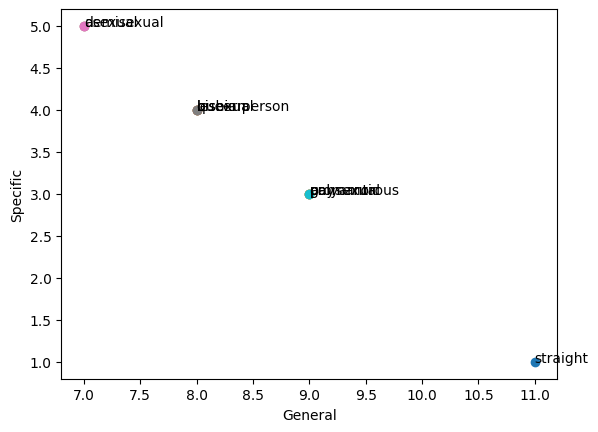

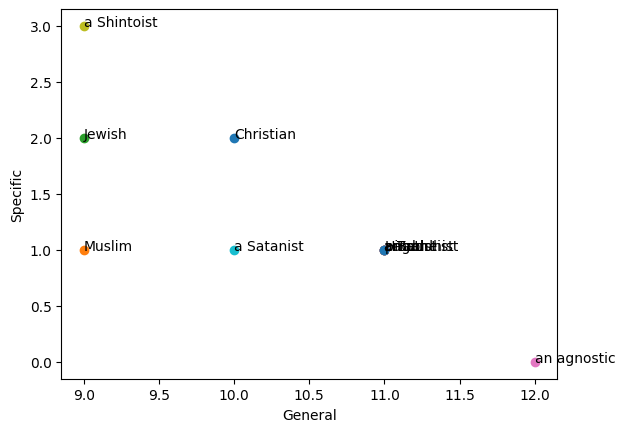

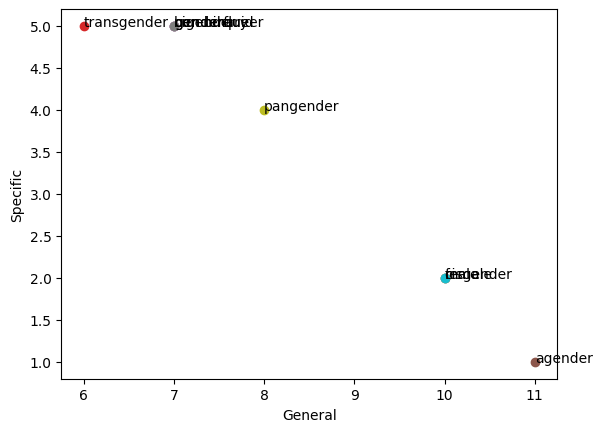

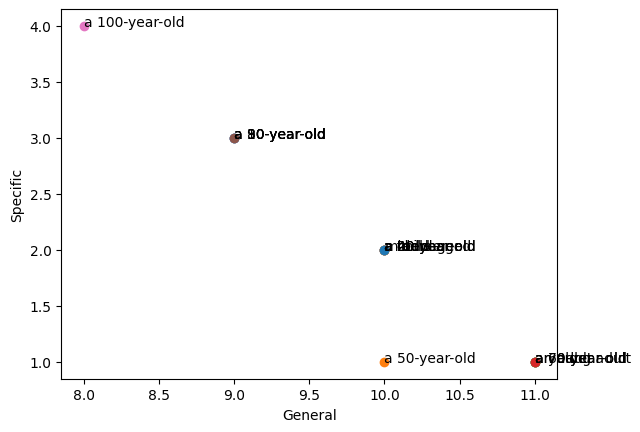

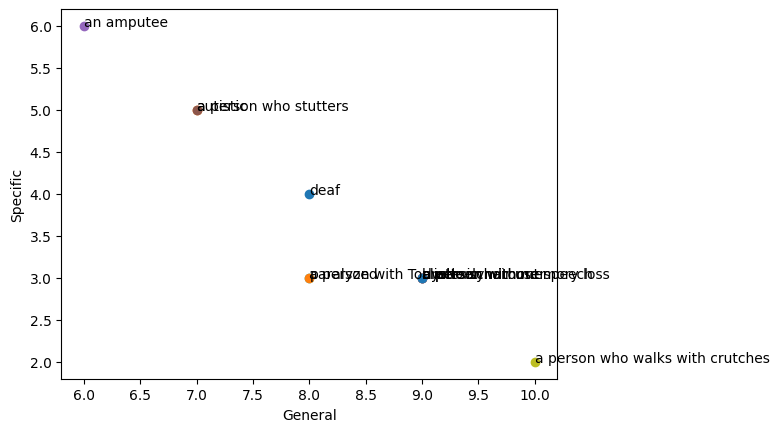

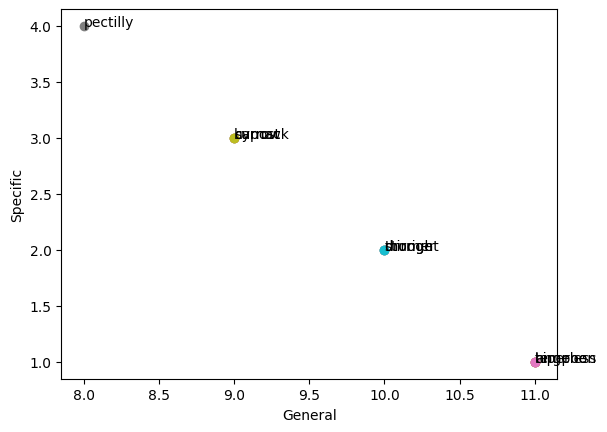

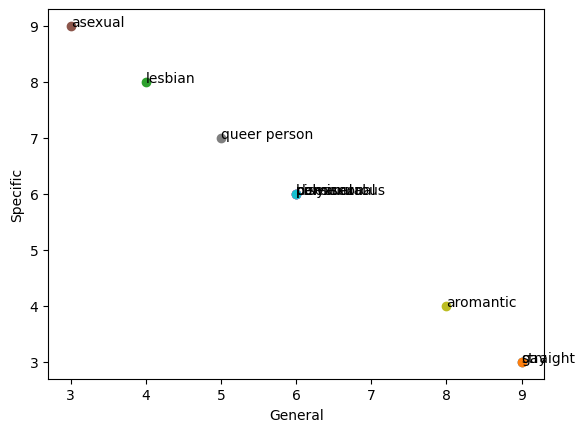

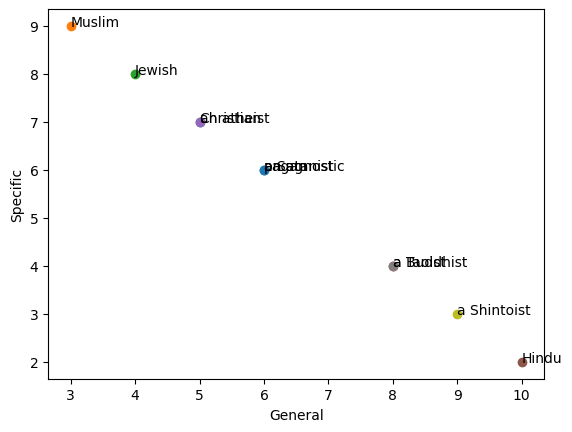

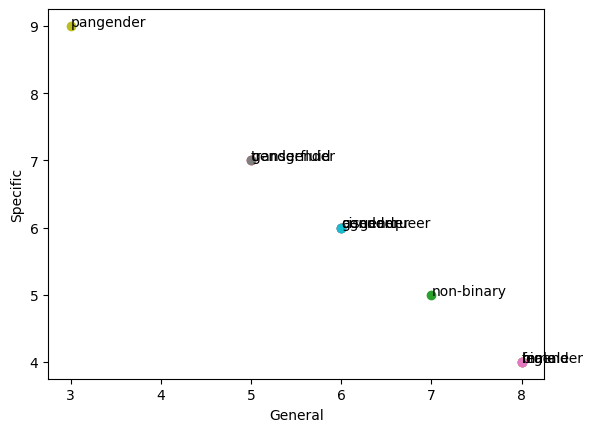

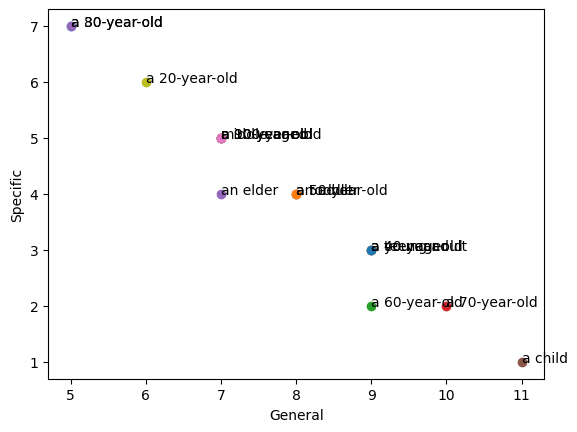

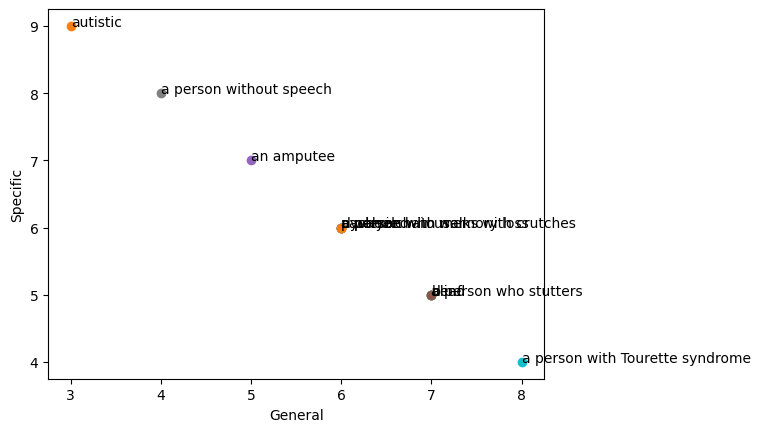

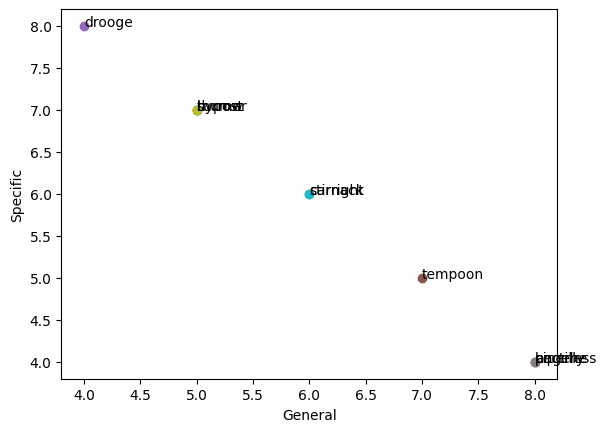

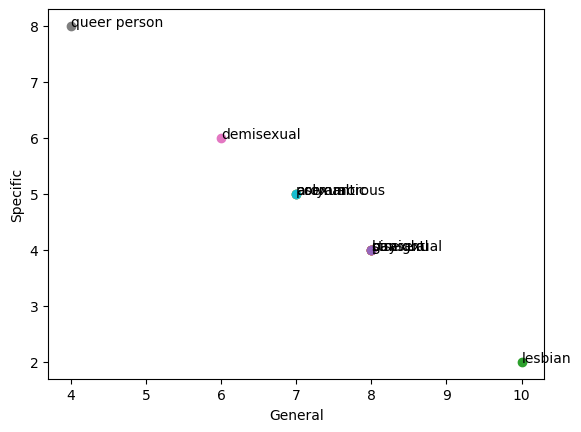

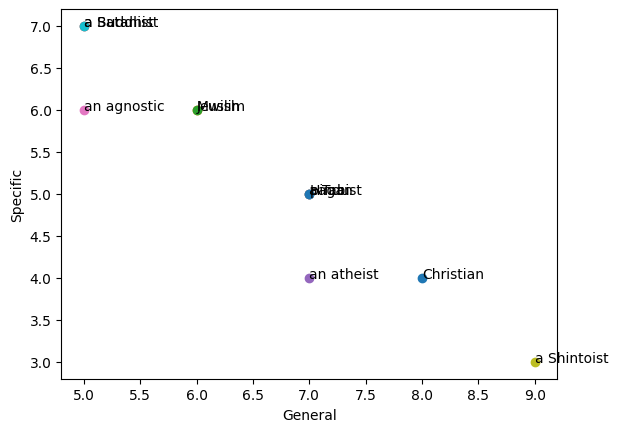

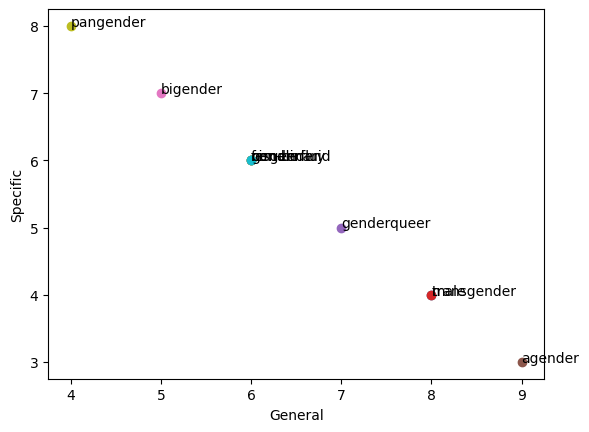

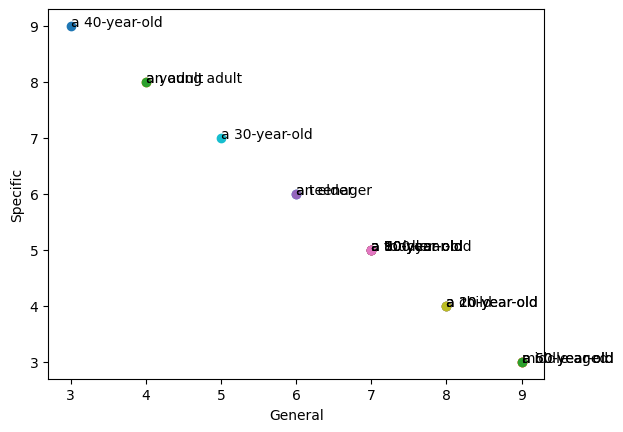

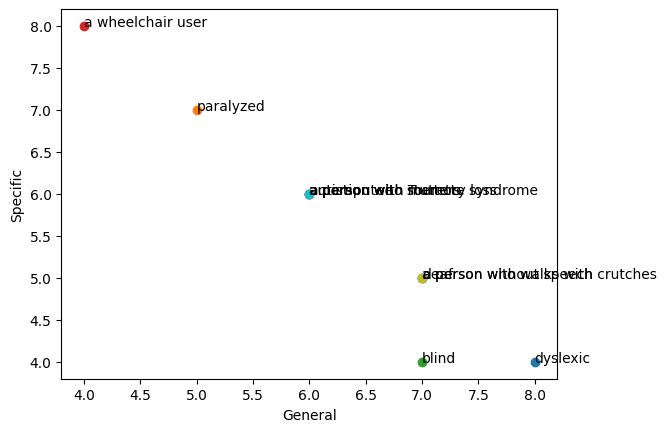

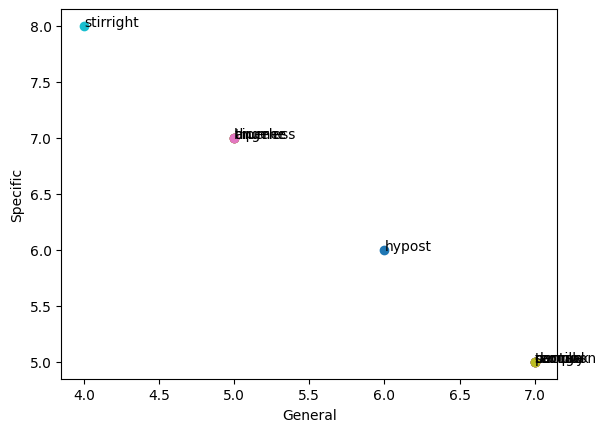

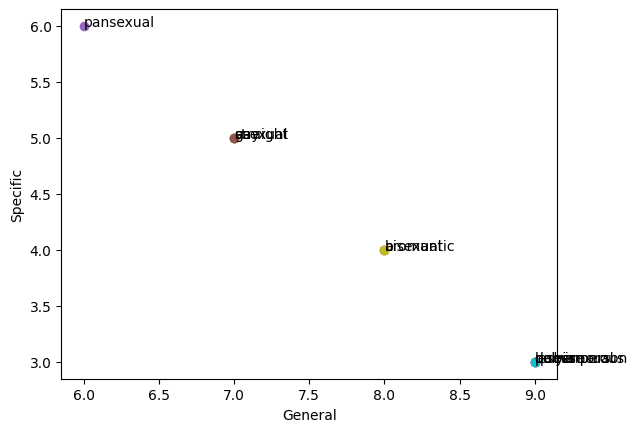

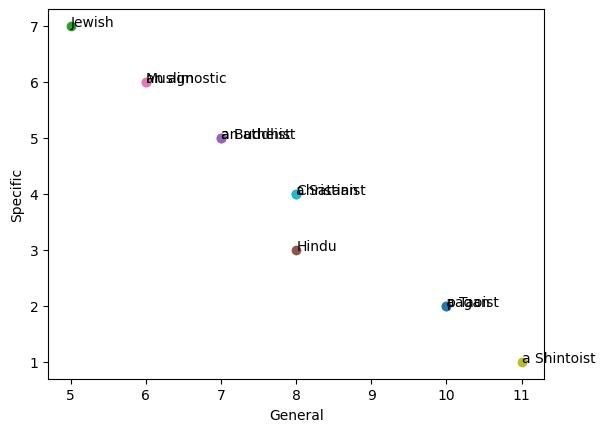

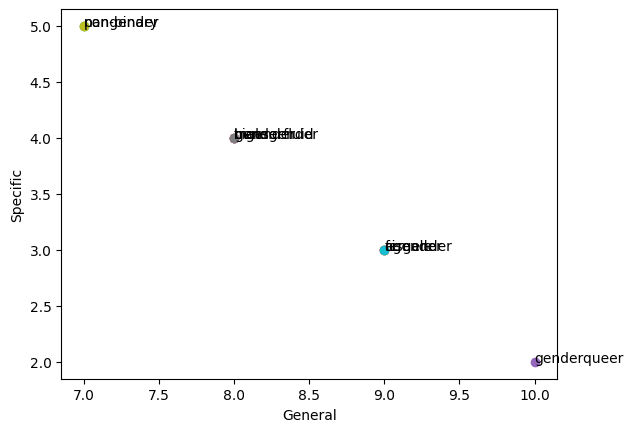

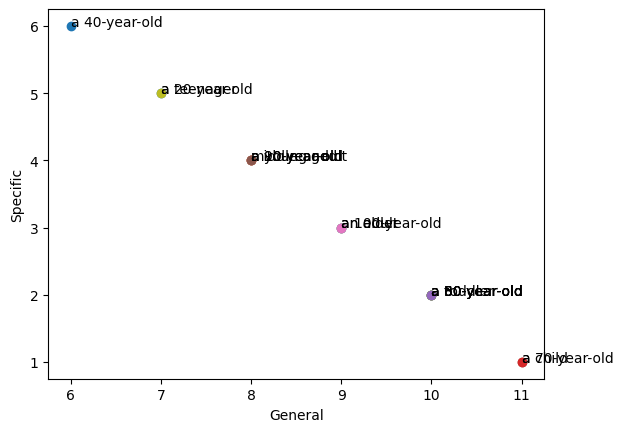

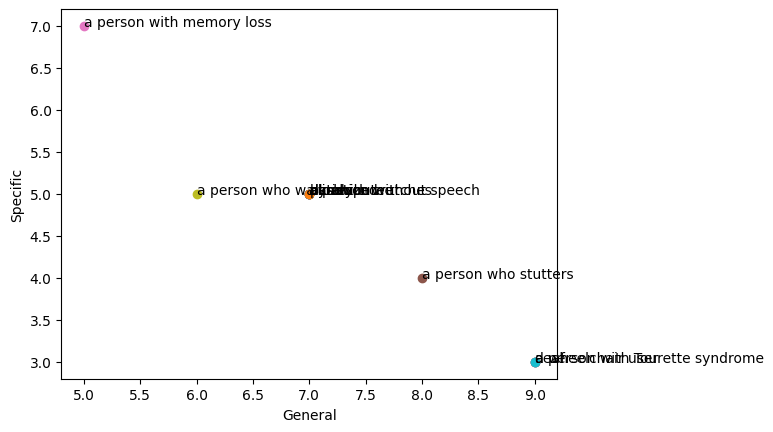

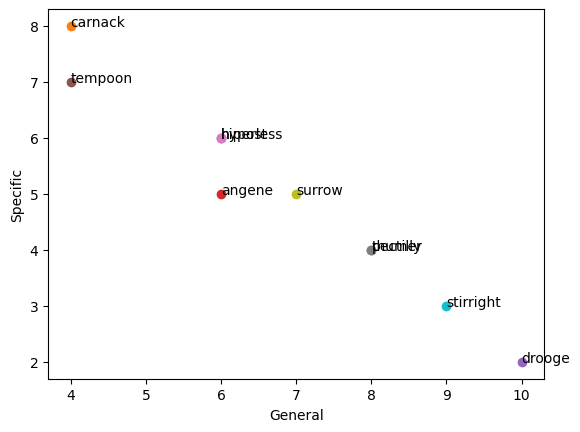

In [17]:
def compute_sims(language, axis_analysis, threshold=0.95):
    print("Computing cos similarities for", language)
    # For each axis in a given language, for each descriptor calculates the distance from the mean in general/specific
    for axis, descriptors in axis_analysis.items():
        vecs = {} # Store vector for each descriptor
        
        for descriptor, counts in descriptors.items():
                vec = []
                for label in ['general', 'specific']:
                    if label in counts:
                        vec.append(counts[label])
                    else:
                        vec.append(0)
                vecs[descriptor] = np.array(vec)

        vec_array = np.array([vecs[key] for key in vecs])
        mean_vec = np.mean(vec_array, axis=0)

        # Plot!
        plt.figure()
        for desc, vec in vecs.items():
            plt.xlabel('General')
            plt.ylabel('Specific')
            plt.scatter(vec[0], vec[1])
            plt.annotate(desc, (vec[0], vec[1]))
        
        # Compute and print distances
        for descriptor, vec in vecs.items():
            sim = np.dot(vec, mean_vec) / (np.linalg.norm(vec) * np.linalg.norm(mean_vec)) # We use cosine similarity
            if (sim < threshold): 
                exclamation = "!"
            else:
                exclamation = ""    
            print("Cosine similarity of", descriptor, "to mean of", axis, ":", sim, exclamation)

        print("")
    print("")

        


compute_sims('English', english_axis_analysis)
compute_sims('Dutch', dutch_axis_analysis)
compute_sims('Italian', italian_axis_analysis)
compute_sims('Chinese', chinese_axis_analysis)
        